In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("/content/sample_data/Fraud.csv")

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.shape

(6362620, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric Features Used:", num_cols)

Numeric Features Used: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


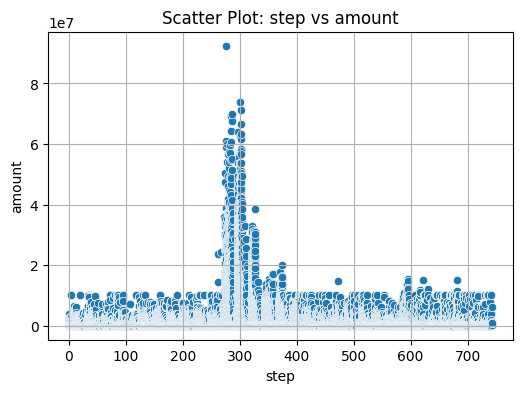

In [11]:
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.title(f"Scatter Plot: {num_cols[0]} vs {num_cols[1]}")
    plt.grid()
    plt.show()

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols].dropna())


In [13]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

In [14]:
sse

[50900960.00000008,
 44480896.31276047,
 35928823.140100054,
 29553312.798909143,
 23184956.93261332,
 20871994.408601914,
 17205356.30772296,
 13808506.63887513,
 12843244.667756993,
 10787508.063026326]

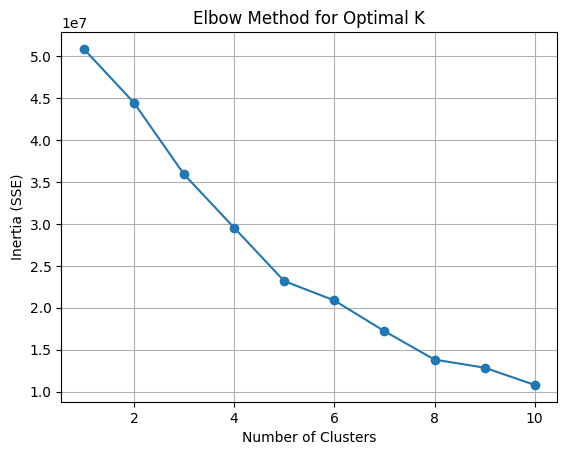

In [15]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [16]:
km_model = KMeans(n_clusters=4, random_state=42)
df['kmeans_cluster'] = km_model.fit_predict(X_scaled)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


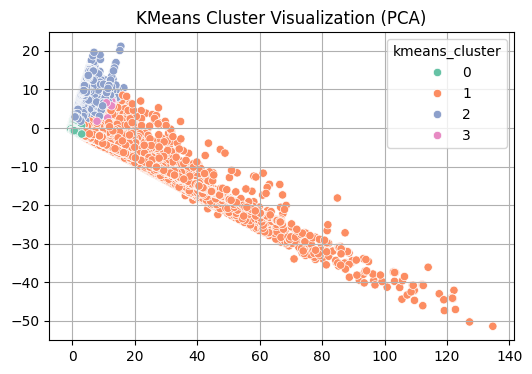

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['kmeans_cluster'], palette='Set2')
plt.title("KMeans Cluster Visualization (PCA)")
plt.grid()
plt.show()